# Change to **GPU : It is fine 😊😊😊😊** 

1.    From **Runtime**
2.   Hardware accelerator select **GPU**.



# **Installation of PyTorch**


In [0]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision


# **Numpy and PyTorch **

**Dependencies**

In [0]:
import torch 
import numpy as np

 Convert array **a** = [[1,2],[3,4]] to numpy array **A** using np.array()

In [6]:
a = [[1,2],[3,4]]
a

[[1, 2], [3, 4]]

In [8]:
A = np.array(a)
A

array([[1, 2],
       [3, 4]])

Convert A to PyTorch Tensor(**A_p**) using **torch.Tensor** 

In [10]:
A_p = torch.Tensor(A)
print(A_p)


 1  2
 3  4
[torch.FloatTensor of size 2x2]



Compare the datatype of **A** and **A_p**


In [11]:
type(A_p)

torch.FloatTensor

In [12]:
type(A)

numpy.ndarray

Convert Torch to Numpy using **torch_tensor.numpy()**

# **Variable**

**Variables**

*     A Variable wraps a Tensor.
 
*  Allow accumulation of gradients.

Import the Variable class =>** from torch.autograd import Variable**

In [0]:
from torch.autograd import Variable

1.   create **a** torch tensor of ones(2,2)
2.   wrap in Variable(**a_V**) with r**equires_grad** for differentiability
3. To verify with **print(a_V.requires_grad)**


In [15]:
a = torch.ones(2,2)
a


 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [0]:
a_V = Variable((a), requires_grad= True)

In [20]:
a_V.requires_grad

True

# **CS231n example**

**Define the leaf nodes** =====> variable_name = Variable(**Tensor_datatype**(**[numerical_value**]))

*   DoubleTensor - datatype
*   FloatTensor - datatype



In [0]:
#x0 = Variable(DoubleTensor([-1]))
x = Variable(DoubleTensor([-2]), requires_grad=True)
y = Variable(DoubleTensor([5]), requires_grad=True)
z = Variable(DoubleTensor([-4]), requires_grad=True)


Recall: import the from datatype class. import Tensor Datatype =>** from torch import FloatTensor, DoubleTensor**

In [0]:
 from torch import FloatTensor, DoubleTensor

Recall that the **nodes** are **operations**

In [0]:
q = x + y 

In [0]:
f = q * z

In [32]:
print(q.grad_fn)

In [33]:
print(f.grad_fn)

brackprop with** backward()**

In [0]:
f.backward()

In [35]:
x.grad

Variable containing:
-4
[torch.DoubleTensor of size 1]

In [36]:
y.grad

Variable containing:
-4
[torch.DoubleTensor of size 1]

In [37]:
z.grad

Variable containing:
 3
[torch.DoubleTensor of size 1]

print the operation on each intermediate node with **node.grad_fn**

Gradient of leaf nodes(x,y,z) wr.t to last node using **node.grad**

**From cs231n**

1. **add** node: gradient distributor
2. **mu**l node: gradient switcher



# **Dataloader**

In [0]:
import numpy as np
import matplotlib.pyplot as plt

Recall from the last class with used this dataset

In [0]:
x = ([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
y = ([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])

Convert to numpy array using** np.array(....)** and reshape with** np.reshape(...)**

In [0]:
x_n = np.array(x)
y_n = np.array(y)

In [4]:
x_n.shape

(17,)

In [0]:
x_s = np.reshape((x_n),(17,1))
y_s = np.reshape((y_n),(17,1))

In [6]:
x_s.shape

(17, 1)

In [7]:
from torch.utils.data import Dataset, DataLoader

ModuleNotFoundError: ignored

import from Dataset and DataLoader using =>** from torch.utils.data import Dataset, DataLoader**



```
class dataname(Dataset):
  
  def __init__(self):


*   train_x(np.array**(x**), **dtype**=np.double} #download x
*   train_y(np.array(**y**),** dtype**=np.double} #download y
    

*   self.len = train_x.shape[0]  # length of the sample

*   self.x_data = torch.from_numpy(train_x).float()
*   self.y_data = torch.from_numpy(train_y).float()
    
 
 
 def __getitem__(self,index):
    return self.x_data[index], self.y_data[index]
    
  def __len__(self):
    return self.len
```



    
    

In [0]:
class myData(Dataset):
  def __init__(self):
      train_x = np.array(x, dtype=np.double)
      train_y = np.array(y, dtype=np.double)
      
      train_xs = np.reshape((train_x), (17,1))
      train_ys = np.reshape((train_y), (17,1))
      
      # Length of the sample
      self.len = train_x.shape[0]
      # convert to torch tensor
      self.x_data = torch.from_numpy(train_xs).float()
      self.y_data = torch.from_numpy(train_ys).float()
      
  
  def __getitem__(self,index):
      return self.x_data[index], self.y_data[index]
    
  def __len__(self):
      return self.len

Make an instance of myData class

In [0]:
myDataInstance = myData()

Feed the DataLoader 


>train_loader = DataLoader(**dataset**=....,
                          **batch_size**=....,
                          **shuffle**=....,
                          **num_workers**=...)



In [0]:
train_loader = DataLoader(dataset=myDataInstance, batch_size=1, shuffle=True, num_workers=1)

**Next Week Linear Regression bear with us**

In [0]:
import torch.nn as nn

#Step 1: Create Model Class

# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out
      

In [0]:
#Step 2: Instantiate Model Class
model = LinearRegression()

######---------GPU---------######

if torch.cuda.is_available():
    model.cuda()

In [0]:
# Step 3: Instantiate loss class
criterion = nn.MSELoss()
learning_rate = 0.0001

#Step 4: Instantiate Optimizer class
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [69]:
epochs = 500

for epoch in range(epochs):
  for i, data in enumerate(train_loader, 0):
      # get the input
      inputs , labels = data
      
      ######---------GPU---------######
      if torch.cuda.is_available():
         inputs, labels = Variable(inputs).cuda() , Variable(labels).cuda()
       
      else:
        #wrap with variable
         inputs, labels = Variable(inputs), Variable(labels)
      
      #Clear gradient w.r.t parameters # Flag
      optimizer.zero_grad()
      
      #Forward to get output
      outputs = model(inputs)
      
      #Calculate loss
      loss = criterion(outputs, labels)
      
      # Getting gradients w.r.t parameters
      loss.backward()
    
       #updating parameters
      optimizer.step()
    
    
      print('epoch {}, loss {}'.format(epoch, loss.data[0]))

epoch 0, loss 25.74050521850586
epoch 0, loss 16.937368392944336
epoch 0, loss 51.23142623901367
epoch 0, loss 7.31990909576416
epoch 0, loss 34.55195236206055
epoch 0, loss 37.15137481689453
epoch 0, loss 11.306672096252441
epoch 0, loss 21.46686553955078
epoch 0, loss 4.665514945983887
epoch 0, loss 54.99455642700195
epoch 0, loss 9.305984497070312
epoch 0, loss 37.09797668457031
epoch 0, loss 17.994415283203125
epoch 0, loss 19.01062774658203
epoch 0, loss 24.414342880249023
epoch 0, loss 29.680984497070312
epoch 0, loss 54.37561798095703
epoch 1, loss 9.250636100769043
epoch 1, loss 19.204143524169922
epoch 1, loss 31.605754852294922
epoch 1, loss 25.424253463745117
epoch 1, loss 5.402976036071777
epoch 1, loss 11.36015510559082
epoch 1, loss 28.390653610229492
epoch 1, loss 25.178741455078125
epoch 1, loss 14.205946922302246
epoch 1, loss 19.825498580932617
epoch 1, loss 16.533283233642578
epoch 1, loss 43.304996490478516
epoch 1, loss 13.008382797241211
epoch 1, loss 36.032268524

epoch 12, loss 0.12188520282506943
epoch 12, loss 0.7643506526947021
epoch 12, loss 2.408292293548584
epoch 12, loss 0.45415905117988586
epoch 12, loss 1.1795352697372437
epoch 12, loss 0.4241029620170593
epoch 12, loss 0.2669741213321686
epoch 12, loss 0.5010453462600708
epoch 12, loss 0.4013127088546753
epoch 12, loss 2.681234121322632
epoch 12, loss 0.0034317749086767435
epoch 13, loss 2.226602554321289
epoch 13, loss 0.08141494542360306
epoch 13, loss 0.24140144884586334
epoch 13, loss 0.5361879467964172
epoch 13, loss 0.007810262031853199
epoch 13, loss 0.758421003818512
epoch 13, loss 2.574535608291626
epoch 13, loss 0.6886031031608582
epoch 13, loss 0.387179970741272
epoch 13, loss 0.9446544647216797
epoch 13, loss 0.8531960844993591
epoch 13, loss 0.20710933208465576
epoch 13, loss 0.27768975496292114
epoch 13, loss 0.9205539226531982
epoch 13, loss 0.6323217749595642
epoch 13, loss 0.2291819155216217
epoch 13, loss 0.36656513810157776
epoch 14, loss 0.348908931016922
epoch 14,

epoch 21, loss 0.05466854199767113
epoch 21, loss 0.2663232088088989
epoch 21, loss 0.016517208889126778
epoch 21, loss 0.011378162540495396
epoch 21, loss 0.022200588136911392
epoch 21, loss 0.05115300416946411
epoch 21, loss 0.31382840871810913
epoch 22, loss 0.8668848276138306
epoch 22, loss 0.024906810373067856
epoch 22, loss 0.2509553134441376
epoch 22, loss 1.5644556283950806
epoch 22, loss 0.24270077049732208
epoch 22, loss 0.017619755119085312
epoch 22, loss 0.0364399291574955
epoch 22, loss 0.004898522049188614
epoch 22, loss 0.19679804146289825
epoch 22, loss 0.0019566500559449196
epoch 22, loss 0.4371025860309601
epoch 22, loss 0.025217177346348763
epoch 22, loss 0.1969592571258545
epoch 22, loss 0.3016316890716553
epoch 22, loss 0.039058152586221695
epoch 22, loss 0.045397114008665085
epoch 22, loss 0.04299823194742203
epoch 23, loss 1.5396003723144531
epoch 23, loss 0.03436441347002983
epoch 23, loss 0.19406017661094666
epoch 23, loss 0.04360976815223694
epoch 23, loss 0.8

epoch 30, loss 0.007685709744691849
epoch 30, loss 0.1647244244813919
epoch 30, loss 0.025933941826224327
epoch 30, loss 0.2414369434118271
epoch 30, loss 0.6350591778755188
epoch 30, loss 0.14987537264823914
epoch 30, loss 0.09477125853300095
epoch 30, loss 0.0028735557571053505
epoch 30, loss 1.344307541847229
epoch 30, loss 0.6348999738693237
epoch 30, loss 0.1291937530040741
epoch 30, loss 0.1430201381444931
epoch 30, loss 0.002531013684347272
epoch 30, loss 0.1323934942483902
epoch 30, loss 0.012314742431044579
epoch 30, loss 0.03143637999892235
epoch 31, loss 0.12511207163333893
epoch 31, loss 0.23977382481098175
epoch 31, loss 0.6301424503326416
epoch 31, loss 0.003063260344788432
epoch 31, loss 0.01154391560703516
epoch 31, loss 0.1485653668642044
epoch 31, loss 0.033227935433387756
epoch 31, loss 0.07111211866140366
epoch 31, loss 0.09601631760597229
epoch 31, loss 0.01151672750711441
epoch 31, loss 0.023604892194271088
epoch 31, loss 0.12891384959220886
epoch 31, loss 0.14316

epoch 39, loss 0.1512240469455719
epoch 39, loss 0.1278141438961029
epoch 39, loss 1.2949683666229248
epoch 39, loss 0.11443833261728287
epoch 39, loss 0.000711726606823504
epoch 39, loss 0.18463094532489777
epoch 39, loss 0.07192275673151016
epoch 39, loss 0.08966504037380219
epoch 39, loss 0.1658608466386795
epoch 39, loss 0.5675301551818848
epoch 39, loss 0.6846857666969299
epoch 39, loss 0.023250842466950417
epoch 39, loss 0.0002765388635452837
epoch 39, loss 0.21926423907279968
epoch 40, loss 0.018964365124702454
epoch 40, loss 0.6728742718696594
epoch 40, loss 0.0014742619823664427
epoch 40, loss 0.13136905431747437
epoch 40, loss 0.1225561797618866
epoch 40, loss 0.07564879208803177
epoch 40, loss 1.2950955629348755
epoch 40, loss 0.555809497833252
epoch 40, loss 1.8404991351417266e-05
epoch 40, loss 0.2110665887594223
epoch 40, loss 0.004429920110851526
epoch 40, loss 0.19307442009449005
epoch 40, loss 0.05262760445475578
epoch 40, loss 0.16945646703243256
epoch 40, loss 0.1493

epoch 49, loss 0.5393924117088318
epoch 49, loss 0.18861830234527588
epoch 49, loss 0.19568946957588196
epoch 49, loss 0.05395655333995819
epoch 49, loss 0.09193862974643707
epoch 49, loss 0.06960561126470566
epoch 49, loss 6.341224434436299e-09
epoch 49, loss 0.11205927282571793
epoch 49, loss 0.6974038481712341
epoch 49, loss 0.005548912566155195
epoch 49, loss 0.017546283081173897
epoch 49, loss 0.0007583907572552562
epoch 50, loss 0.017451602965593338
epoch 50, loss 0.6870014667510986
epoch 50, loss 0.11901219189167023
epoch 50, loss 0.16299553215503693
epoch 50, loss 0.0002459694223944098
epoch 50, loss 0.14910073578357697
epoch 50, loss 0.5679638385772705
epoch 50, loss 0.2133619636297226
epoch 50, loss 1.2807416915893555
epoch 50, loss 0.004472996573895216
epoch 50, loss 0.055267203599214554
epoch 50, loss 0.1865701675415039
epoch 50, loss 0.09012360870838165
epoch 50, loss 0.07175086438655853
epoch 50, loss 0.026762453839182854
epoch 50, loss 0.12303440272808075
epoch 50, loss 

epoch 60, loss 0.02754979021847248
epoch 60, loss 0.17743176221847534
epoch 60, loss 0.12493418902158737
epoch 60, loss 0.16341914236545563
epoch 60, loss 0.5681891441345215
epoch 60, loss 0.14544598758220673
epoch 60, loss 0.11432044953107834
epoch 60, loss 0.052138134837150574
epoch 60, loss 0.21121656894683838
epoch 60, loss 0.06899367272853851
epoch 60, loss 0.004717931617051363
epoch 60, loss 0.016318580135703087
epoch 60, loss 4.931200237479061e-06
epoch 60, loss 0.0005009655142202973
epoch 60, loss 0.6965193152427673
epoch 60, loss 1.28236985206604
epoch 60, loss 0.09320328384637833
epoch 61, loss 0.11966615170240402
epoch 61, loss 0.17326326668262482
epoch 61, loss 0.17741067707538605
epoch 61, loss 1.2883778810501099
epoch 61, loss 0.14462867379188538
epoch 61, loss 0.005021701101213694
epoch 61, loss 0.06880229711532593
epoch 61, loss 0.016296537593007088
epoch 61, loss 0.11053831875324249
epoch 61, loss 2.833869439200498e-05
epoch 61, loss 0.5428948998451233
epoch 61, loss 0

epoch 71, loss 0.09197702258825302
epoch 71, loss 0.14356249570846558
epoch 71, loss 0.06998757272958755
epoch 71, loss 1.2723028659820557
epoch 71, loss 0.20516899228096008
epoch 71, loss 0.10647505521774292
epoch 71, loss 0.03338753804564476
epoch 71, loss 0.1804075688123703
epoch 71, loss 0.015656666830182076
epoch 71, loss 0.054622504860162735
epoch 71, loss 0.18263927102088928
epoch 71, loss 0.0053129238076508045
epoch 71, loss 0.5561895966529846
epoch 71, loss 0.00043201513472013175
epoch 71, loss 0.6972274780273438
epoch 71, loss 0.1217547282576561
epoch 71, loss 1.5041638107504696e-05
epoch 72, loss 0.0005740070482715964
epoch 72, loss 0.5532830357551575
epoch 72, loss 0.015503049828112125
epoch 72, loss 0.7012917995452881
epoch 72, loss 0.14301805198192596
epoch 72, loss 0.20869889855384827
epoch 72, loss 0.05279422923922539
epoch 72, loss 0.16808423399925232
epoch 72, loss 0.1709710657596588
epoch 72, loss 0.021694904193282127
epoch 72, loss 0.0768301784992218
epoch 72, loss 

epoch 82, loss 0.16491298377513885
epoch 82, loss 0.04779462888836861
epoch 82, loss 0.00022629245358984917
epoch 82, loss 0.08804376423358917
epoch 82, loss 0.0008817738271318376
epoch 82, loss 0.14410650730133057
epoch 82, loss 0.16311106085777283
epoch 82, loss 1.2957427501678467
epoch 82, loss 0.1248568445444107
epoch 82, loss 0.005648563615977764
epoch 82, loss 0.02367762289941311
epoch 82, loss 0.07379169017076492
epoch 82, loss 0.560494065284729
epoch 83, loss 0.1184898167848587
epoch 83, loss 1.265017032623291
epoch 83, loss 0.09804787486791611
epoch 83, loss 0.003912928514182568
epoch 83, loss 0.06430117040872574
epoch 83, loss 0.10536561161279678
epoch 83, loss 0.033618390560150146
epoch 83, loss 0.19296422600746155
epoch 83, loss 0.0003511942340992391
epoch 83, loss 0.2045954167842865
epoch 83, loss 0.014875008724629879
epoch 83, loss 0.17670981585979462
epoch 83, loss 0.54805988073349
epoch 83, loss 0.7061976194381714
epoch 83, loss 0.05239671841263771
epoch 83, loss 0.1410

epoch 92, loss 0.00032815049053169787
epoch 92, loss 0.09542738646268845
epoch 92, loss 0.004486240912228823
epoch 92, loss 0.11030476540327072
epoch 92, loss 1.2599903345108032
epoch 92, loss 0.00012614484876394272
epoch 92, loss 0.01395074650645256
epoch 92, loss 0.032591018825769424
epoch 92, loss 0.1789565086364746
epoch 92, loss 0.6988453269004822
epoch 92, loss 0.2069583237171173
epoch 93, loss 0.06950085610151291
epoch 93, loss 2.0751124338858062e-06
epoch 93, loss 0.20480963587760925
epoch 93, loss 0.02806759998202324
epoch 93, loss 0.6929609775543213
epoch 93, loss 0.11588302254676819
epoch 93, loss 0.16326169669628143
epoch 93, loss 0.0006818095571361482
epoch 93, loss 0.16479216516017914
epoch 93, loss 0.1271807700395584
epoch 93, loss 0.01670415699481964
epoch 93, loss 0.0880226120352745
epoch 93, loss 0.14267919957637787
epoch 93, loss 0.04564224183559418
epoch 93, loss 0.006466459017246962
epoch 93, loss 0.5719528794288635
epoch 93, loss 1.277845859527588
epoch 94, loss 0

epoch 102, loss 0.05226658284664154
epoch 102, loss 1.267179012298584
epoch 102, loss 0.004000329412519932
epoch 102, loss 0.10780280828475952
epoch 102, loss 0.7061731219291687
epoch 102, loss 0.06837420910596848
epoch 102, loss 0.095526322722435
epoch 102, loss 4.416973752086051e-06
epoch 102, loss 0.026603244245052338
epoch 102, loss 0.5523622632026672
epoch 102, loss 0.00024828946334309876
epoch 102, loss 0.13641226291656494
epoch 102, loss 0.11403557658195496
epoch 102, loss 0.013806741684675217
epoch 102, loss 0.18893073499202728
epoch 102, loss 0.17104145884513855
epoch 103, loss 0.05097219720482826
epoch 103, loss 1.2706704139709473
epoch 103, loss 0.1369888037443161
epoch 103, loss 0.06652557104825974
epoch 103, loss 0.5408446788787842
epoch 103, loss 0.18220587074756622
epoch 103, loss 0.10653076320886612
epoch 103, loss 0.01363785658031702
epoch 103, loss 0.03161807358264923
epoch 103, loss 0.0036391806788742542
epoch 103, loss 0.1878301203250885
epoch 103, loss 0.2024813741

epoch 112, loss 0.11140991747379303
epoch 112, loss 0.1689947098493576
epoch 112, loss 0.6865667700767517
epoch 112, loss 0.0002635866403579712
epoch 112, loss 0.12376070022583008
epoch 112, loss 0.20614662766456604
epoch 112, loss 0.00046879288856871426
epoch 112, loss 0.023294925689697266
epoch 112, loss 0.13823045790195465
epoch 112, loss 0.04847557470202446
epoch 112, loss 0.015493165701627731
epoch 112, loss 0.09047488123178482
epoch 112, loss 0.07454032450914383
epoch 112, loss 0.005383223760873079
epoch 112, loss 0.5609875321388245
epoch 112, loss 1.262751579284668
epoch 112, loss 0.18290264904499054
epoch 113, loss 0.004453213885426521
epoch 113, loss 0.11709107458591461
epoch 113, loss 0.5451528429985046
epoch 113, loss 0.03076876327395439
epoch 113, loss 0.1342606246471405
epoch 113, loss 0.17650902271270752
epoch 113, loss 7.179844487836817e-07
epoch 113, loss 0.00024367890728171915
epoch 113, loss 0.17910218238830566
epoch 113, loss 0.2035066932439804
epoch 113, loss 0.0943

epoch 121, loss 0.0005489197210408747
epoch 121, loss 0.137539342045784
epoch 121, loss 0.000208006109460257
epoch 121, loss 0.07358432561159134
epoch 121, loss 0.022753797471523285
epoch 121, loss 0.16239506006240845
epoch 121, loss 0.015759337693452835
epoch 121, loss 0.207441046833992
epoch 121, loss 0.00574129493907094
epoch 121, loss 1.2762012481689453
epoch 121, loss 0.555873453617096
epoch 121, loss 0.16891023516654968
epoch 121, loss 0.11226560175418854
epoch 121, loss 0.11683472245931625
epoch 122, loss 0.026995809748768806
epoch 122, loss 0.6933444738388062
epoch 122, loss 0.20431597530841827
epoch 122, loss 0.04922521486878395
epoch 122, loss 0.0004546332638710737
epoch 122, loss 0.014890889637172222
epoch 122, loss 0.005129832308739424
epoch 122, loss 0.13630211353302002
epoch 122, loss 1.2668652534484863
epoch 122, loss 1.8951070615003118e-06
epoch 122, loss 0.10953091830015182
epoch 122, loss 0.09735175967216492
epoch 122, loss 0.0672326534986496
epoch 122, loss 0.1713940

epoch 131, loss 0.164218932390213
epoch 131, loss 0.11421648412942886
epoch 131, loss 5.8992452977690846e-05
epoch 131, loss 0.07024704664945602
epoch 131, loss 0.013782939873635769
epoch 131, loss 0.051684118807315826
epoch 131, loss 1.2607901096343994
epoch 131, loss 0.09763680398464203
epoch 131, loss 0.1328844428062439
epoch 131, loss 0.6977941393852234
epoch 131, loss 0.00480499304831028
epoch 131, loss 0.11900889873504639
epoch 131, loss 0.2003881335258484
epoch 131, loss 0.0255549568682909
epoch 131, loss 0.5515892505645752
epoch 131, loss 0.0001481833023717627
epoch 131, loss 0.17928223311901093
epoch 132, loss 1.258213996887207
epoch 132, loss 0.0001365033385809511
epoch 132, loss 0.5403499603271484
epoch 132, loss 0.18944011628627777
epoch 132, loss 0.19672919809818268
epoch 132, loss 0.11170057207345963
epoch 132, loss 0.012458959594368935
epoch 132, loss 0.03085438907146454
epoch 132, loss 0.05655774101614952
epoch 132, loss 0.17282132804393768
epoch 132, loss 0.09626219421

epoch 140, loss 1.269407033920288
epoch 140, loss 0.19976362586021423
epoch 140, loss 0.013437296263873577
epoch 140, loss 0.004238562658429146
epoch 140, loss 0.025050487369298935
epoch 140, loss 0.09493698924779892
epoch 140, loss 0.1127736046910286
epoch 140, loss 0.06922657787799835
epoch 140, loss 0.11551986634731293
epoch 140, loss 1.453373101867328e-07
epoch 140, loss 0.16891884803771973
epoch 140, loss 0.00023264515039045364
epoch 141, loss 0.19898425042629242
epoch 141, loss 0.11574038118124008
epoch 141, loss 0.1684490293264389
epoch 141, loss 0.5516579747200012
epoch 141, loss 0.06572341173887253
epoch 141, loss 1.243416666984558
epoch 141, loss 0.1031370609998703
epoch 141, loss 0.030743926763534546
epoch 141, loss 0.7090603709220886
epoch 141, loss 4.918501872452907e-06
epoch 141, loss 0.052512917667627335
epoch 141, loss 0.0002176997804781422
epoch 141, loss 0.004261410795152187
epoch 141, loss 0.013326863758265972
epoch 141, loss 0.13179481029510498
epoch 141, loss 0.172

epoch 149, loss 0.5368574857711792
epoch 149, loss 0.0001742726453812793
epoch 149, loss 0.10752430558204651
epoch 149, loss 0.7224807739257812
epoch 149, loss 0.00321199675090611
epoch 149, loss 0.19295983016490936
epoch 149, loss 0.185626819729805
epoch 149, loss 0.054348696023225784
epoch 149, loss 0.01269362960010767
epoch 149, loss 0.026247920468449593
epoch 149, loss 0.16538850963115692
epoch 149, loss 0.11234134435653687
epoch 149, loss 0.00019498156325425953
epoch 150, loss 0.004226929508149624
epoch 150, loss 0.0001849921973189339
epoch 150, loss 0.6918075084686279
epoch 150, loss 0.12065227329730988
epoch 150, loss 0.00012385247100610286
epoch 150, loss 0.07149627059698105
epoch 150, loss 0.5531092286109924
epoch 150, loss 0.1684134155511856
epoch 150, loss 0.09571380168199539
epoch 150, loss 0.11209423840045929
epoch 150, loss 0.16900862753391266
epoch 150, loss 0.013720200397074223
epoch 150, loss 1.2615505456924438
epoch 150, loss 0.19677995145320892
epoch 150, loss 0.1298

epoch 159, loss 0.013132245279848576
epoch 159, loss 0.11774874478578568
epoch 159, loss 4.087293200427666e-05
epoch 159, loss 0.004176055081188679
epoch 159, loss 0.5497128367424011
epoch 159, loss 0.10602710396051407
epoch 159, loss 0.12714752554893494
epoch 159, loss 0.02903352677822113
epoch 159, loss 0.19242198765277863
epoch 159, loss 0.7093627452850342
epoch 159, loss 0.052357759326696396
epoch 160, loss 0.11011242866516113
epoch 160, loss 0.6962825655937195
epoch 160, loss 0.15691469609737396
epoch 160, loss 0.07449997216463089
epoch 160, loss 0.0049397582188248634
epoch 160, loss 0.09302932769060135
epoch 160, loss 0.013699738308787346
epoch 160, loss 0.5625264644622803
epoch 160, loss 6.028496864018962e-05
epoch 160, loss 0.1297808289527893
epoch 160, loss 0.19630970060825348
epoch 160, loss 1.2486907243728638
epoch 160, loss 0.055451761931180954
epoch 160, loss 0.026692837476730347
epoch 160, loss 0.11368144303560257
epoch 160, loss 7.1901515184436e-05
epoch 160, loss 0.1760

epoch 169, loss 0.556069016456604
epoch 169, loss 1.0083781489811372e-05
epoch 169, loss 0.16454526782035828
epoch 169, loss 0.19606396555900574
epoch 169, loss 1.2497289180755615
epoch 169, loss 0.011718351393938065
epoch 169, loss 0.17530767619609833
epoch 169, loss 0.09709832817316055
epoch 169, loss 0.12843436002731323
epoch 169, loss 0.05068570002913475
epoch 169, loss 0.004355746321380138
epoch 169, loss 0.07022038102149963
epoch 169, loss 0.023692520335316658
epoch 169, loss 0.00015986000653356314
epoch 169, loss 0.11107593029737473
epoch 170, loss 0.00011691576219163835
epoch 170, loss 1.2471822500228882
epoch 170, loss 0.11100506782531738
epoch 170, loss 3.8927315472392365e-05
epoch 170, loss 0.1036694347858429
epoch 170, loss 0.06184666231274605
epoch 170, loss 0.18792177736759186
epoch 170, loss 0.5238538980484009
epoch 170, loss 0.009923571720719337
epoch 170, loss 0.18997448682785034
epoch 170, loss 0.7245310544967651
epoch 170, loss 0.12524859607219696
epoch 170, loss 0.1

epoch 180, loss 1.2427566051483154
epoch 180, loss 0.17125511169433594
epoch 180, loss 0.12556639313697815
epoch 180, loss 0.05350194871425629
epoch 180, loss 0.1921927034854889
epoch 180, loss 0.6995314955711365
epoch 180, loss 0.00010857814777409658
epoch 180, loss 0.012301040813326836
epoch 180, loss 0.022116653621196747
epoch 180, loss 0.00017100847617257386
epoch 180, loss 0.07140042632818222
epoch 180, loss 0.11089515686035156
epoch 180, loss 0.0038678699638694525
epoch 180, loss 0.09795770794153214
epoch 180, loss 0.1638101041316986
epoch 180, loss 0.5595983862876892
epoch 180, loss 0.11508011072874069
epoch 181, loss 0.06744053214788437
epoch 181, loss 0.541739284992218
epoch 181, loss 0.17426645755767822
epoch 181, loss 3.558400203473866e-05
epoch 181, loss 0.1903713494539261
epoch 181, loss 0.7064031958580017
epoch 181, loss 1.2450029850006104
epoch 181, loss 0.11078260093927383
epoch 181, loss 0.17829085886478424
epoch 181, loss 3.979419489041902e-06
epoch 181, loss 0.024993

epoch 191, loss 0.1911683976650238
epoch 191, loss 0.6982017159461975
epoch 191, loss 0.15859726071357727
epoch 191, loss 0.018782155588269234
epoch 191, loss 0.11672147363424301
epoch 191, loss 0.04638749733567238
epoch 191, loss 1.2600206136703491
epoch 191, loss 0.09568371623754501
epoch 191, loss 0.0002156467380700633
epoch 191, loss 0.012251114472746849
epoch 191, loss 0.5577781796455383
epoch 191, loss 6.807033787481487e-05
epoch 191, loss 0.11403734982013702
epoch 191, loss 0.12405149638652802
epoch 191, loss 0.0662526935338974
epoch 191, loss 0.16822130978107452
epoch 191, loss 0.0036564315669238567
epoch 192, loss 1.239679217338562
epoch 192, loss 0.1037827655673027
epoch 192, loss 1.4953593563404866e-06
epoch 192, loss 0.1736534982919693
epoch 192, loss 0.003197959391400218
epoch 192, loss 0.026170337572693825
epoch 192, loss 0.7003145813941956
epoch 192, loss 0.19305157661437988
epoch 192, loss 0.12500667572021484
epoch 192, loss 0.011529703624546528
epoch 192, loss 0.068460

epoch 201, loss 1.7913265764946118e-05
epoch 201, loss 0.052045952528715134
epoch 201, loss 0.06870714575052261
epoch 201, loss 0.00351784098893404
epoch 201, loss 0.16683228313922882
epoch 201, loss 0.1158599704504013
epoch 201, loss 0.19067241251468658
epoch 201, loss 0.011071867309510708
epoch 201, loss 0.12302424758672714
epoch 201, loss 0.024121614173054695
epoch 201, loss 0.0989169105887413
epoch 201, loss 0.10974516719579697
epoch 201, loss 0.16154147684574127
epoch 201, loss 0.5535657405853271
epoch 201, loss 1.2356994152069092
epoch 201, loss 0.7097117900848389
epoch 202, loss 0.12292763590812683
epoch 202, loss 0.05249827727675438
epoch 202, loss 0.06821943819522858
epoch 202, loss 0.16725148260593414
epoch 202, loss 1.2444112300872803
epoch 202, loss 0.10645155608654022
epoch 202, loss 9.330696229881141e-06
epoch 202, loss 1.5823034118511714e-06
epoch 202, loss 0.16742587089538574
epoch 202, loss 0.1895180493593216
epoch 202, loss 0.11188790947198868
epoch 202, loss 0.538944

epoch 212, loss 0.022604146972298622
epoch 212, loss 0.011025729589164257
epoch 212, loss 0.12229607254266739
epoch 212, loss 0.1590847223997116
epoch 212, loss 8.91575837158598e-05
epoch 212, loss 0.07142361253499985
epoch 212, loss 1.2416305541992188
epoch 212, loss 0.0032471974845975637
epoch 212, loss 0.18687677383422852
epoch 212, loss 0.5380401015281677
epoch 212, loss 0.10602818429470062
epoch 212, loss 0.00013917368778493255
epoch 212, loss 0.10705222934484482
epoch 212, loss 0.05790413171052933
epoch 212, loss 0.10207291692495346
epoch 212, loss 0.7162513136863708
epoch 212, loss 0.16912978887557983
epoch 213, loss 0.1587197631597519
epoch 213, loss 0.1548764705657959
epoch 213, loss 0.017814192920923233
epoch 213, loss 0.012138455174863338
epoch 213, loss 0.07563777267932892
epoch 213, loss 1.2522636651992798
epoch 213, loss 0.6873560547828674
epoch 213, loss 0.004820209462195635
epoch 213, loss 0.0001583533303346485
epoch 213, loss 0.0003792285278905183
epoch 213, loss 0.124

epoch 221, loss 1.2339868545532227
epoch 221, loss 0.7064741253852844
epoch 221, loss 0.0035909865982830524
epoch 221, loss 0.050989534705877304
epoch 221, loss 0.1143023893237114
epoch 221, loss 0.15940915048122406
epoch 221, loss 6.10649585723877e-05
epoch 221, loss 0.1217082217335701
epoch 221, loss 0.1567428559064865
epoch 221, loss 0.011426713317632675
epoch 221, loss 0.11365491896867752
epoch 221, loss 0.0717151015996933
epoch 221, loss 0.5522467494010925
epoch 221, loss 0.10126352310180664
epoch 221, loss 3.364010262885131e-05
epoch 222, loss 0.10011503100395203
epoch 222, loss 0.15766584873199463
epoch 222, loss 7.636586087755859e-05
epoch 222, loss 0.6827684044837952
epoch 222, loss 0.14377273619174957
epoch 222, loss 0.0009197607869282365
epoch 222, loss 0.014751016162335873
epoch 222, loss 0.0408625453710556
epoch 222, loss 0.01283580157905817
epoch 222, loss 0.19740889966487885
epoch 222, loss 0.12489138543605804
epoch 222, loss 0.0783991813659668
epoch 222, loss 0.12403873

epoch 231, loss 0.050658974796533585
epoch 231, loss 0.09857773780822754
epoch 231, loss 0.00017849022697191685
epoch 231, loss 0.6850409507751465
epoch 231, loss 0.14472225308418274
epoch 231, loss 0.011956633068621159
epoch 231, loss 0.12336378544569016
epoch 231, loss 0.14037512242794037
epoch 231, loss 0.00029836714384146035
epoch 231, loss 0.013775019906461239
epoch 231, loss 0.08152689039707184
epoch 231, loss 0.12440232932567596
epoch 231, loss 1.2586396932601929
epoch 231, loss 0.11449109017848969
epoch 231, loss 0.004270691890269518
epoch 231, loss 0.18942329287528992
epoch 231, loss 0.5546835064888
epoch 232, loss 1.2302966117858887
epoch 232, loss 0.025727903470396996
epoch 232, loss 0.1651650071144104
epoch 232, loss 0.16143646836280823
epoch 232, loss 0.003952790051698685
epoch 232, loss 4.002229616162367e-05
epoch 232, loss 0.11054608970880508
epoch 232, loss 0.010297514498233795
epoch 232, loss 7.465459930244833e-05
epoch 232, loss 0.06885997205972672
epoch 232, loss 0.1


epoch 240, loss 0.09641700237989426
epoch 240, loss 0.11814603209495544
epoch 240, loss 0.11235333234071732
epoch 240, loss 0.0038777515292167664
epoch 240, loss 0.010306686162948608
epoch 240, loss 1.2361807823181152
epoch 240, loss 0.06669995933771133
epoch 240, loss 0.7030414938926697
epoch 240, loss 0.5503402352333069
epoch 240, loss 0.023618154227733612
epoch 241, loss 0.16022560000419617
epoch 241, loss 0.00012059465370839462
epoch 241, loss 0.5505754947662354
epoch 241, loss 0.11703862249851227
epoch 241, loss 0.06548329442739487
epoch 241, loss 0.025131305679678917
epoch 241, loss 0.00936153531074524
epoch 241, loss 0.10409068316221237
epoch 241, loss 0.10732613503932953
epoch 241, loss 0.05670446529984474
epoch 241, loss 8.939431609178428e-06
epoch 241, loss 0.7088439464569092
epoch 241, loss 0.16006645560264587
epoch 241, loss 1.2378123998641968
epoch 241, loss 0.10132711380720139
epoch 241, loss 0.0034584472887218
epoch 241, loss 0.18502894043922424
epoch 242, loss 0.003225

epoch 250, loss 0.020525068044662476
epoch 250, loss 0.11776838451623917
epoch 250, loss 0.06999299675226212
epoch 250, loss 0.009651311673223972
epoch 250, loss 0.6935906410217285
epoch 250, loss 0.0003057385329157114
epoch 250, loss 0.11225809156894684
epoch 250, loss 2.1711251974920742e-05
epoch 250, loss 0.1517891138792038
epoch 250, loss 0.18813340365886688
epoch 250, loss 0.14819763600826263
epoch 250, loss 1.2481292486190796
epoch 250, loss 0.5563310980796814
epoch 250, loss 0.11176066100597382
epoch 250, loss 0.10227815061807632
epoch 250, loss 0.003290763823315501
epoch 251, loss 0.5451109409332275
epoch 251, loss 0.06416654586791992
epoch 251, loss 0.05598539113998413
epoch 251, loss 0.1677958071231842
epoch 251, loss 0.009423437528312206
epoch 251, loss 1.225054383277893
epoch 251, loss 0.002543671755120158
epoch 251, loss 0.10559287667274475
epoch 251, loss 0.024395141750574112
epoch 251, loss 2.4843598112056497e-06
epoch 251, loss 0.10918495059013367
epoch 251, loss 0.1149

epoch 260, loss 0.0033637613523751497
epoch 260, loss 0.11564404517412186
epoch 260, loss 0.18241487443447113
epoch 260, loss 0.1599975973367691
epoch 260, loss 0.15273377299308777
epoch 260, loss 0.046476785093545914
epoch 260, loss 0.11374608427286148
epoch 260, loss 0.07259684801101685
epoch 260, loss 1.2334429025650024
epoch 260, loss 4.946798526361817e-07
epoch 260, loss 4.121201709494926e-05
epoch 260, loss 0.5436568856239319
epoch 260, loss 0.10565486550331116
epoch 260, loss 0.1080634817481041
epoch 260, loss 0.00850649829953909
epoch 260, loss 0.025112714618444443
epoch 260, loss 0.7058682441711426
epoch 261, loss 9.238756319973618e-07
epoch 261, loss 0.10784774273633957
epoch 261, loss 0.05153506249189377
epoch 261, loss 0.0033154007978737354
epoch 261, loss 0.009289908222854137
epoch 261, loss 1.225385069847107
epoch 261, loss 0.10753728449344635
epoch 261, loss 0.1062396913766861
epoch 261, loss 0.16597875952720642
epoch 261, loss 0.5443799495697021
epoch 261, loss 0.113488

epoch 269, loss 1.7239599401364103e-05
epoch 269, loss 0.00031054308055900037
epoch 269, loss 0.04689446836709976
epoch 269, loss 0.5602827668190002
epoch 269, loss 0.6892715692520142
epoch 269, loss 0.010012883692979813
epoch 269, loss 0.11698634922504425
epoch 269, loss 0.017848066985607147
epoch 269, loss 1.2375296354293823
epoch 269, loss 0.11483295261859894
epoch 269, loss 0.003334895707666874
epoch 269, loss 0.18184152245521545
epoch 270, loss 0.021253153681755066
epoch 270, loss 0.15454524755477905
epoch 270, loss 0.0002793291350826621
epoch 270, loss 0.003837384982034564
epoch 270, loss 0.5550301671028137
epoch 270, loss 0.6952420473098755
epoch 270, loss 0.11522120237350464
epoch 270, loss 0.11521845310926437
epoch 270, loss 0.10912209004163742
epoch 270, loss 0.050210922956466675
epoch 270, loss 1.2280117273330688
epoch 270, loss 9.97279494185932e-06
epoch 270, loss 0.1598336100578308
epoch 270, loss 0.00910399854183197
epoch 270, loss 0.1816578507423401
epoch 270, loss 0.102


epoch 279, loss 0.0185871385037899
epoch 279, loss 0.00028873930568806827
epoch 279, loss 0.1145256981253624
epoch 279, loss 0.047725848853588104
epoch 279, loss 0.00943888071924448
epoch 279, loss 0.5566654801368713
epoch 279, loss 0.11106465011835098
epoch 279, loss 9.675384717411362e-06
epoch 279, loss 0.6976710557937622
epoch 279, loss 0.09917562454938889
epoch 279, loss 0.07280320674180984
epoch 279, loss 0.18258120119571686
epoch 279, loss 0.0034673423506319523
epoch 279, loss 1.2260795831680298
epoch 279, loss 0.10460978001356125
epoch 279, loss 0.16212961077690125
epoch 280, loss 0.0030093705281615257
epoch 280, loss 0.1794082373380661
epoch 280, loss 0.05234499275684357
epoch 280, loss 0.15627087652683258
epoch 280, loss 0.11331870406866074
epoch 280, loss 0.10120207816362381
epoch 280, loss 1.2275341749191284
epoch 280, loss 0.11228038370609283
epoch 280, loss 1.7428197679691948e-05
epoch 280, loss 0.06633642315864563
epoch 280, loss 0.10316278785467148
epoch 280, loss 0.709


epoch 288, loss 0.09122347086668015
epoch 288, loss 0.11758926510810852
epoch 288, loss 1.2547762393951416
epoch 288, loss 0.000878696795552969
epoch 288, loss 0.07776135206222534
epoch 288, loss 0.11851608008146286
epoch 288, loss 0.1839335411787033
epoch 288, loss 0.11234086751937866
epoch 288, loss 0.0036953736562281847
epoch 288, loss 0.5546256303787231
epoch 289, loss 0.10291796177625656
epoch 289, loss 1.2217237949371338
epoch 289, loss 0.002614477649331093
epoch 289, loss 4.033209916087799e-05
epoch 289, loss 0.10737394541501999
epoch 289, loss 0.16383635997772217
epoch 289, loss 0.11126111447811127
epoch 289, loss 0.6995398998260498
epoch 289, loss 0.008870948106050491
epoch 289, loss 0.048175148665905
epoch 289, loss 0.0002996492839884013
epoch 289, loss 0.0718684196472168
epoch 289, loss 0.15029841661453247
epoch 289, loss 0.5586406588554382
epoch 289, loss 0.179753378033638
epoch 289, loss 0.02026805840432644
epoch 289, loss 0.10769589990377426
epoch 290, loss 0.02063472196

epoch 298, loss 0.15298880636692047
epoch 298, loss 0.11186537891626358
epoch 298, loss 0.10906240344047546
epoch 298, loss 0.00315255019813776
epoch 298, loss 0.11078085750341415
epoch 298, loss 1.215185284614563
epoch 298, loss 0.10714905709028244
epoch 298, loss 0.7041046023368835
epoch 298, loss 0.008388976566493511
epoch 298, loss 0.1786249428987503
epoch 298, loss 1.608840102562681e-05
epoch 298, loss 9.218601189786568e-05
epoch 298, loss 0.0503934808075428
epoch 298, loss 0.5485358238220215
epoch 298, loss 0.15895237028598785
epoch 298, loss 0.06846051663160324
epoch 298, loss 0.020881080999970436
epoch 299, loss 0.1062273308634758
epoch 299, loss 0.5409383177757263
epoch 299, loss 0.1736794263124466
epoch 299, loss 1.747799979057163e-05
epoch 299, loss 0.002040162915363908
epoch 299, loss 0.10783271491527557
epoch 299, loss 0.16912685334682465
epoch 299, loss 0.10658695548772812
epoch 299, loss 0.05263712257146835
epoch 299, loss 0.02088121883571148
epoch 299, loss 0.0081472601

epoch 307, loss 0.10372517257928848
epoch 307, loss 0.17386528849601746
epoch 307, loss 0.05474460497498512
epoch 307, loss 0.1601593792438507
epoch 307, loss 3.319355528219603e-05
epoch 308, loss 0.06757929176092148
epoch 308, loss 0.10528428852558136
epoch 308, loss 0.1532319337129593
epoch 308, loss 0.00023211087682284415
epoch 308, loss 0.008296447806060314
epoch 308, loss 0.14918245375156403
epoch 308, loss 0.6794198751449585
epoch 308, loss 0.5698635578155518
epoch 308, loss 0.1151927188038826
epoch 308, loss 0.04676403850317001
epoch 308, loss 0.0038170893676579
epoch 308, loss 0.18037141859531403
epoch 308, loss 1.2248531579971313
epoch 308, loss 2.545620191085618e-05
epoch 308, loss 0.10932254791259766
epoch 308, loss 0.1055515855550766
epoch 308, loss 0.02124919183552265
epoch 309, loss 0.10871623456478119
epoch 309, loss 2.3679154764977284e-05
epoch 309, loss 0.10568416118621826
epoch 309, loss 1.2118520736694336
epoch 309, loss 0.10093474388122559
epoch 309, loss 0.16575619

epoch 318, loss 3.115711297141388e-05
epoch 318, loss 0.007739017717540264
epoch 318, loss 0.14988701045513153
epoch 318, loss 0.00031145126558840275
epoch 318, loss 0.017112446948885918
epoch 318, loss 0.5563457012176514
epoch 318, loss 0.10984360426664352
epoch 318, loss 0.17471422255039215
epoch 318, loss 0.06622888147830963
epoch 318, loss 0.1022457480430603
epoch 318, loss 0.002140505937859416
epoch 318, loss 0.16268670558929443
epoch 318, loss 0.7015841603279114
epoch 318, loss 1.218231439590454
epoch 318, loss 0.05161714553833008
epoch 318, loss 0.10793706029653549
epoch 318, loss 0.10465937107801437
epoch 319, loss 0.5460922122001648
epoch 319, loss 1.0564843250904232e-05
epoch 319, loss 1.2037464380264282
epoch 319, loss 0.7165330648422241
epoch 319, loss 0.007251619361341
epoch 319, loss 0.021502818912267685
epoch 319, loss 0.10731109976768494
epoch 319, loss 0.0025122410152107477
epoch 319, loss 0.15590709447860718
epoch 319, loss 0.0689433291554451
epoch 319, loss 0.0507547

epoch 327, loss 0.0018583190394565463
epoch 327, loss 0.09841619431972504
epoch 327, loss 0.00624005775898695
epoch 327, loss 0.16792573034763336
epoch 327, loss 0.02671925537288189
epoch 327, loss 5.257043812889606e-05
epoch 327, loss 0.10080238431692123
epoch 327, loss 0.059280287474393845
epoch 327, loss 0.11207371950149536
epoch 327, loss 0.16570204496383667
epoch 327, loss 0.707274317741394
epoch 328, loss 0.5456430315971375
epoch 328, loss 0.10560643672943115
epoch 328, loss 0.17064432799816132
epoch 328, loss 0.16356606781482697
epoch 328, loss 0.10569625347852707
epoch 328, loss 8.849129699228797e-06
epoch 328, loss 0.0022650365717709064
epoch 328, loss 0.00013441663759294897
epoch 328, loss 0.00684810895472765
epoch 328, loss 0.06433878093957901
epoch 328, loss 0.09998561441898346
epoch 328, loss 0.7159249186515808
epoch 328, loss 0.05224281921982765
epoch 328, loss 0.019922716543078423
epoch 328, loss 0.10428477078676224
epoch 328, loss 0.14645087718963623
epoch 328, loss 1.2

epoch 337, loss 0.00424682442098856
epoch 337, loss 0.5668079853057861
epoch 337, loss 0.1765465885400772
epoch 337, loss 0.10916872322559357
epoch 337, loss 0.10297395288944244
epoch 337, loss 0.00031282444251701236
epoch 337, loss 0.1456521451473236
epoch 337, loss 0.07394448667764664
epoch 337, loss 0.007786344736814499
epoch 337, loss 0.10738272964954376
epoch 337, loss 1.2174559831619263
epoch 338, loss 0.6955156326293945
epoch 338, loss 0.007755721919238567
epoch 338, loss 0.003387059783563018
epoch 338, loss 0.5542826056480408
epoch 338, loss 0.050102852284908295
epoch 338, loss 0.1491544544696808
epoch 338, loss 0.0162141602486372
epoch 338, loss 0.1767003983259201
epoch 338, loss 0.10126504302024841
epoch 338, loss 0.11375701427459717
epoch 338, loss 1.217573881149292
epoch 338, loss 0.06803635507822037
epoch 338, loss 0.00010322497837478295
epoch 338, loss 6.006303374306299e-05
epoch 338, loss 0.15176273882389069
epoch 338, loss 0.10626109689474106
epoch 338, loss 0.106569364

epoch 346, loss 0.17239034175872803
epoch 346, loss 0.00010097013000631705
epoch 347, loss 0.6967979073524475
epoch 347, loss 0.1093543991446495
epoch 347, loss 0.07037145644426346
epoch 347, loss 0.007029947359114885
epoch 347, loss 0.049393996596336365
epoch 347, loss 0.14727245271205902
epoch 347, loss 0.1374843418598175
epoch 347, loss 0.003975727595388889
epoch 347, loss 0.10749334841966629
epoch 347, loss 0.5623254776000977
epoch 347, loss 0.0003077846486121416
epoch 347, loss 0.01668900065124035
epoch 347, loss 2.6130637706955895e-05
epoch 347, loss 0.17479175329208374
epoch 347, loss 0.11103493720293045
epoch 347, loss 1.209390640258789
epoch 347, loss 0.10742879658937454
epoch 348, loss 0.1529330462217331
epoch 348, loss 0.01748320832848549
epoch 348, loss 0.007264029700309038
epoch 348, loss 0.11069929599761963
epoch 348, loss 0.0028279833495616913
epoch 348, loss 0.1044592335820198
epoch 348, loss 5.078289905213751e-05
epoch 348, loss 0.17342615127563477
epoch 348, loss 0.54

epoch 358, loss 0.018870742991566658
epoch 358, loss 0.00010425702930660918
epoch 358, loss 0.10344750434160233
epoch 358, loss 0.06793514639139175
epoch 358, loss 0.006417642813175917
epoch 358, loss 0.7006075382232666
epoch 358, loss 0.5509084463119507
epoch 358, loss 0.002437378279864788
epoch 358, loss 0.10348803550004959
epoch 358, loss 0.15579001605510712
epoch 358, loss 0.0001283177698496729
epoch 358, loss 0.10579448193311691
epoch 358, loss 1.2065825462341309
epoch 358, loss 0.05223497375845909
epoch 358, loss 0.10660610347986221
epoch 358, loss 0.16860181093215942
epoch 358, loss 0.15453211963176727
epoch 359, loss 0.10298845171928406
epoch 359, loss 0.00014219382137525827
epoch 359, loss 0.16976496577262878
epoch 359, loss 0.06607411056756973
epoch 359, loss 0.002104806713759899
epoch 359, loss 0.10910847038030624
epoch 359, loss 0.15132299065589905
epoch 359, loss 0.01774628646671772
epoch 359, loss 1.2081588506698608
epoch 359, loss 0.5388599038124084
epoch 359, loss 0.102

epoch 367, loss 0.1024286076426506
epoch 367, loss 0.006418807897716761
epoch 367, loss 0.14979858696460724
epoch 367, loss 0.0003060053859371692
epoch 367, loss 0.11006354540586472
epoch 367, loss 0.1059049442410469
epoch 368, loss 0.006338927429169416
epoch 368, loss 0.15084239840507507
epoch 368, loss 0.549211323261261
epoch 368, loss 6.790520274080336e-05
epoch 368, loss 1.1968289613723755
epoch 368, loss 0.09997295588254929
epoch 368, loss 0.00034392261295579374
epoch 368, loss 0.7137494683265686
epoch 368, loss 0.002328932983800769
epoch 368, loss 0.10290946811437607
epoch 368, loss 0.06498469412326813
epoch 368, loss 0.02144831418991089
epoch 368, loss 0.15294329822063446
epoch 368, loss 0.10720354318618774
epoch 368, loss 0.10768894106149673
epoch 368, loss 0.16912822425365448
epoch 368, loss 0.05109435319900513
epoch 369, loss 0.14979638159275055
epoch 369, loss 0.00030458898982033134
epoch 369, loss 0.5502539277076721
epoch 369, loss 0.14804330468177795
epoch 369, loss 0.0699

epoch 378, loss 0.6958982348442078
epoch 378, loss 0.0031525769736617804
epoch 378, loss 6.831643986515701e-05
epoch 378, loss 0.10251393169164658
epoch 378, loss 0.1424693912267685
epoch 378, loss 0.007001450285315514
epoch 378, loss 0.11312761157751083
epoch 378, loss 0.07254122942686081
epoch 378, loss 0.0003472822718322277
epoch 378, loss 0.13797630369663239
epoch 378, loss 0.5592567324638367
epoch 378, loss 0.10455156862735748
epoch 378, loss 0.170832097530365
epoch 378, loss 0.04760519042611122
epoch 378, loss 1.2085565328598022
epoch 378, loss 0.10436470806598663
epoch 378, loss 0.01898745447397232
epoch 379, loss 1.197401762008667
epoch 379, loss 0.0018842472927644849
epoch 379, loss 0.021095508709549904
epoch 379, loss 0.10977882146835327
epoch 379, loss 0.7018094062805176
epoch 379, loss 0.0064497897401452065
epoch 379, loss 0.00028301513521000743
epoch 379, loss 0.14505241811275482
epoch 379, loss 5.754743324359879e-05
epoch 379, loss 0.07283537089824677
epoch 379, loss 0.17

epoch 388, loss 1.1943315267562866
epoch 388, loss 0.005321216303855181
epoch 388, loss 0.06331541389226913
epoch 388, loss 0.09738144278526306
epoch 388, loss 0.5252937078475952
epoch 388, loss 0.09329880774021149
epoch 388, loss 0.0007536380435340106
epoch 388, loss 0.17181776463985443
epoch 388, loss 4.356816134531982e-05
epoch 388, loss 0.09810977429151535
epoch 388, loss 0.11678892374038696
epoch 388, loss 0.16061875224113464
epoch 388, loss 0.16548354923725128
epoch 388, loss 0.001558875199407339
epoch 388, loss 0.022544682025909424
epoch 388, loss 0.0548710823059082
epoch 388, loss 0.7088042497634888
epoch 389, loss 0.04949525371193886
epoch 389, loss 0.0026390631683170795
epoch 389, loss 0.14601196348667145
epoch 389, loss 0.0004371493705548346
epoch 389, loss 0.11057193577289581
epoch 389, loss 0.16878953576087952
epoch 389, loss 0.14031189680099487
epoch 389, loss 0.07241452485322952
epoch 389, loss 0.6865012049674988
epoch 389, loss 0.5626448392868042
epoch 389, loss 0.10796

epoch 398, loss 0.14291736483573914
epoch 398, loss 0.04710204154253006
epoch 398, loss 1.2052993774414062
epoch 398, loss 0.10435961931943893
epoch 398, loss 0.6993967294692993
epoch 398, loss 0.01521178800612688
epoch 398, loss 0.10016421973705292
epoch 398, loss 0.14107884466648102
epoch 398, loss 0.07428304105997086
epoch 398, loss 0.5555727481842041
epoch 398, loss 0.0025008060038089752
epoch 398, loss 0.0002064547734335065
epoch 398, loss 0.10704778134822845
epoch 398, loss 0.10814540088176727
epoch 398, loss 0.16634592413902283
epoch 398, loss 0.005621341988444328
epoch 398, loss 0.0002507675962988287
epoch 399, loss 0.0002489247708581388
epoch 399, loss 0.0022821801248937845
epoch 399, loss 0.05027569457888603
epoch 399, loss 0.0001946321572177112
epoch 399, loss 0.01702454686164856
epoch 399, loss 0.005864083766937256
epoch 399, loss 0.1454482227563858
epoch 399, loss 0.1687769889831543
epoch 399, loss 0.10707805305719376
epoch 399, loss 0.09899205714464188
epoch 399, loss 0.5


epoch 409, loss 0.0018301013624295592
epoch 409, loss 1.1827161312103271
epoch 409, loss 0.1574939787387848
epoch 409, loss 0.099378302693367
epoch 409, loss 0.0005118083208799362
epoch 409, loss 0.05465828627347946
epoch 409, loss 0.7089045643806458
epoch 409, loss 0.09740815311670303
epoch 409, loss 0.017263544723391533
epoch 409, loss 0.10727279633283615
epoch 409, loss 0.06999325007200241
epoch 409, loss 0.1460263580083847
epoch 409, loss 0.5513378381729126
epoch 410, loss 0.6974377036094666
epoch 410, loss 0.13985982537269592
epoch 410, loss 0.0007326711784116924
epoch 410, loss 0.006265433505177498
epoch 410, loss 1.2082191705703735
epoch 410, loss 0.015433128923177719
epoch 410, loss 0.09850820899009705
epoch 410, loss 0.046997785568237305
epoch 410, loss 0.0029072153847664595
epoch 410, loss 0.5528199076652527
epoch 410, loss 0.10377278178930283
epoch 410, loss 0.10934627801179886
epoch 410, loss 0.00027261979994364083
epoch 410, loss 0.06791315227746964
epoch 410, loss 0.1045


epoch 418, loss 0.10332557559013367
epoch 418, loss 0.006111769936978817
epoch 418, loss 0.11055497080087662
epoch 418, loss 0.555388331413269
epoch 418, loss 1.193058967590332
epoch 418, loss 0.16173452138900757
epoch 418, loss 0.15367256104946136
epoch 418, loss 0.0003350142505951226
epoch 418, loss 0.0021261463407427073
epoch 418, loss 0.017563940957188606
epoch 419, loss 0.5421843528747559
epoch 419, loss 0.05298415943980217
epoch 419, loss 0.14566344022750854
epoch 419, loss 0.16404728591442108
epoch 419, loss 0.10523594170808792
epoch 419, loss 0.10157231986522675
epoch 419, loss 0.09496968239545822
epoch 419, loss 0.0004716415423899889
epoch 419, loss 0.0017396560870110989
epoch 419, loss 0.019625673070549965
epoch 419, loss 0.06510679423809052
epoch 419, loss 0.11244677752256393
epoch 419, loss 0.15222246944904327
epoch 419, loss 0.0001684366725385189
epoch 419, loss 0.696858823299408
epoch 419, loss 0.005752175115048885
epoch 419, loss 1.200287938117981
epoch 420, loss 0.1058

epoch 429, loss 0.04945579916238785
epoch 429, loss 0.0023593842051923275
epoch 429, loss 0.693005383014679
epoch 429, loss 0.0057095796801149845
epoch 429, loss 0.07317641377449036
epoch 429, loss 0.13128662109375
epoch 429, loss 0.012388537637889385
epoch 429, loss 0.1680256873369217
epoch 429, loss 0.0007610259344801307
epoch 429, loss 0.13431867957115173
epoch 429, loss 0.11302193999290466
epoch 429, loss 0.5616816878318787
epoch 429, loss 0.1055118516087532
epoch 429, loss 0.09691327810287476
epoch 429, loss 0.1095624789595604
epoch 429, loss 1.1952295303344727
epoch 429, loss 0.0003778091340791434
epoch 430, loss 1.1856789588928223
epoch 430, loss 0.530249834060669
epoch 430, loss 0.15728344023227692
epoch 430, loss 0.15553170442581177
epoch 430, loss 0.10092338919639587
epoch 430, loss 0.052786558866500854
epoch 430, loss 0.09408912807703018
epoch 430, loss 0.0046541825868189335
epoch 430, loss 0.10224010795354843
epoch 430, loss 1.767992216628045e-05
epoch 430, loss 0.710127651

epoch 440, loss 1.1851483583450317
epoch 440, loss 0.0005732190911658108
epoch 440, loss 0.05279083177447319
epoch 440, loss 0.15008127689361572
epoch 440, loss 0.13758991658687592
epoch 440, loss 0.5505931377410889
epoch 440, loss 0.09369141608476639
epoch 440, loss 0.1604391634464264
epoch 440, loss 0.11124389618635178
epoch 440, loss 0.10228661447763443
epoch 440, loss 0.004535095300525427
epoch 440, loss 8.023049304028973e-05
epoch 440, loss 0.7038541436195374
epoch 440, loss 0.06989513337612152
epoch 440, loss 0.10547491908073425
epoch 440, loss 0.016868988052010536
epoch 440, loss 0.0021401308476924896
epoch 441, loss 0.016352586448192596
epoch 441, loss 0.10577618330717087
epoch 441, loss 0.5404607653617859
epoch 441, loss 0.1580587923526764
epoch 441, loss 0.004180894233286381
epoch 441, loss 0.0014407121343538165
epoch 441, loss 1.170777678489685
epoch 441, loss 0.05909258872270584
epoch 441, loss 0.09204073250293732
epoch 441, loss 0.00013529152784030885
epoch 441, loss 0.168

epoch 451, loss 0.10356597602367401
epoch 451, loss 0.09244290739297867
epoch 451, loss 0.00013214859063737094
epoch 451, loss 0.14010941982269287
epoch 451, loss 0.1061713919043541
epoch 451, loss 0.5422310829162598
epoch 451, loss 0.0016175734344869852
epoch 451, loss 0.11327424645423889
epoch 451, loss 0.06562895327806473
epoch 451, loss 0.05262869969010353
epoch 451, loss 1.1770086288452148
epoch 451, loss 0.7153270840644836
epoch 451, loss 0.0005097499815747142
epoch 451, loss 0.1588897407054901
epoch 451, loss 0.004287660587579012
epoch 451, loss 0.1498556286096573
epoch 451, loss 0.016036441549658775
epoch 452, loss 0.16064320504665375
epoch 452, loss 0.10444528609514236
epoch 452, loss 0.10122809559106827
epoch 452, loss 0.09151923656463623
epoch 452, loss 0.0016172474715858698
epoch 452, loss 0.06434337794780731
epoch 452, loss 0.004005065653473139
epoch 452, loss 1.1095201443822589e-05
epoch 452, loss 0.05402214452624321
epoch 452, loss 0.0006361404666677117
epoch 452, loss 0

epoch 461, loss 0.004498146008700132
epoch 461, loss 0.13464008271694183
epoch 461, loss 0.0005103691946715117
epoch 461, loss 0.10678685456514359
epoch 461, loss 0.0002633969997987151
epoch 461, loss 0.07283961772918701
epoch 461, loss 0.09294848144054413
epoch 461, loss 0.046516578644514084
epoch 461, loss 0.10839872062206268
epoch 461, loss 0.5488255023956299
epoch 461, loss 0.6996100544929504
epoch 461, loss 0.13781782984733582
epoch 461, loss 0.10910949110984802
epoch 461, loss 1.1926616430282593
epoch 461, loss 0.002115188864991069
epoch 461, loss 0.1592966616153717
epoch 462, loss 0.15853992104530334
epoch 462, loss 0.09101033955812454
epoch 462, loss 0.1004658192396164
epoch 462, loss 5.2643066737800837e-05
epoch 462, loss 0.11358579993247986
epoch 462, loss 0.7032514214515686
epoch 462, loss 1.1867620944976807
epoch 462, loss 0.5375991463661194
epoch 462, loss 0.05392100289463997
epoch 462, loss 0.06416618078947067
epoch 462, loss 0.14720694720745087
epoch 462, loss 0.00058949

epoch 472, loss 0.09068100154399872
epoch 472, loss 0.06784582138061523
epoch 472, loss 0.0006022792076691985
epoch 472, loss 0.1025298535823822
epoch 472, loss 0.0038940554950386286
epoch 472, loss 0.051704175770282745
epoch 472, loss 0.14649157226085663
epoch 472, loss 0.0003034914843738079
epoch 472, loss 0.002092922804877162
epoch 472, loss 0.015030954964458942
epoch 472, loss 0.15898345410823822
epoch 472, loss 0.6944661736488342
epoch 472, loss 0.5547573566436768
epoch 472, loss 0.1037369966506958
epoch 472, loss 0.1354982554912567
epoch 472, loss 0.10801121592521667
epoch 472, loss 1.189376950263977
epoch 473, loss 1.1797102689743042
epoch 473, loss 0.5325391292572021
epoch 473, loss 0.055563654750585556
epoch 473, loss 0.15421737730503082
epoch 473, loss 0.11343173682689667
epoch 473, loss 0.13813664019107819
epoch 473, loss 0.10396749526262283
epoch 473, loss 0.10380550473928452
epoch 473, loss 0.004012538120150566
epoch 473, loss 0.7014447450637817
epoch 473, loss 0.013714810

epoch 482, loss 0.10285074263811111
epoch 482, loss 0.08912691473960876
epoch 482, loss 0.14553825557231903
epoch 482, loss 1.1800510883331299
epoch 482, loss 0.0016106193652376533
epoch 482, loss 0.06537950038909912
epoch 482, loss 0.0008100612903945148
epoch 482, loss 0.5308663249015808
epoch 482, loss 0.11839570105075836
epoch 482, loss 4.8458041419507936e-06
epoch 482, loss 0.09754690527915955
epoch 482, loss 0.7202597856521606
epoch 482, loss 0.051766104996204376
epoch 482, loss 0.15540461242198944
epoch 482, loss 0.1398528665304184
epoch 483, loss 0.1333601027727127
epoch 483, loss 0.0004138791118748486
epoch 483, loss 0.1067994013428688
epoch 483, loss 0.15797756612300873
epoch 483, loss 0.0481627993285656
epoch 483, loss 0.013918999582529068
epoch 483, loss 0.13721343874931335
epoch 483, loss 0.55604487657547
epoch 483, loss 0.10410606861114502
epoch 483, loss 0.001944751013070345
epoch 483, loss 0.08933911472558975
epoch 483, loss 0.6979084610939026
epoch 483, loss 0.107281699

epoch 494, loss 0.10134631395339966
epoch 494, loss 0.06586333364248276
epoch 494, loss 0.531730055809021
epoch 494, loss 0.019961636513471603
epoch 494, loss 0.08600889891386032
epoch 494, loss 0.1507376879453659
epoch 494, loss 0.14931434392929077
epoch 494, loss 0.0013248790055513382
epoch 494, loss 0.7112008929252625
epoch 494, loss 0.11170495301485062
epoch 494, loss 0.0005701009067706764
epoch 494, loss 0.1398427039384842
epoch 494, loss 0.045447975397109985
epoch 494, loss 1.1874884366989136
epoch 494, loss 0.10452266037464142
epoch 494, loss 0.0037879208102822304
epoch 494, loss 0.0002418809017399326
epoch 495, loss 0.5402097702026367
epoch 495, loss 0.14125961065292358
epoch 495, loss 0.0006925594061613083
epoch 495, loss 1.1719685792922974
epoch 495, loss 0.0033205095678567886
epoch 495, loss 3.511621616780758e-05
epoch 495, loss 0.0013001241022720933
epoch 495, loss 0.1512536257505417
epoch 495, loss 0.08729375153779984
epoch 495, loss 0.15342162549495697
epoch 495, loss 0.0

In [0]:
x_T  = torch.from_numpy(x_s).float()
y_T = torch.from_numpy(y_s).float()

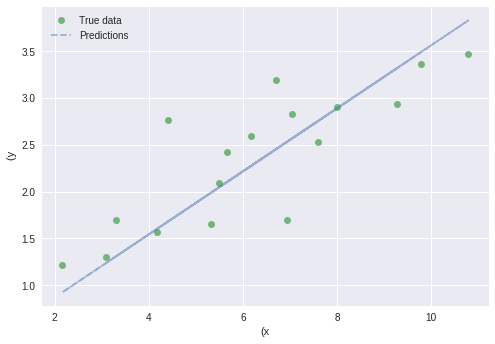

In [71]:
# Clear figure
#plt.clf()

# Get predictions
predicted = model(Variable((x_T))).data.numpy()

# Plot true data
plt.plot(x_T.numpy(), y_T.numpy(), 'go', label= 'True data', alpha=.5)

# Plot predictions
plt.plot(x_T.numpy(), predicted, '--', label="Predictions", alpha=.5)

plt.xlabel("(x")
plt.ylabel(" (y")

# Legend and plot
plt.legend(loc='best')
plt.show()

The values of m and b can be obtained using this statement **print(model.state_dict())**

In [72]:
print(model.state_dict())

OrderedDict([('linear.weight', 
 0.3367
[torch.FloatTensor of size 1x1]
), ('linear.bias', 
 0.1954
[torch.FloatTensor of size 1]
)])


Therefore the equation of the line is y = **0.2655**x + **0.6980**

# **CUDA**

Testing cuda with **torch.cuda.is_available()**  😊😊😊😊

In [59]:
# CPU 
tensor_cpu = torch.ones(3,3)
print(tensor_cpu)


 1  1  1
 1  1  1
 1  1  1
[torch.FloatTensor of size 3x3]



In [0]:
# CPU to GPU
if torch.cuda.is_available():
    tensor_cpu.cuda()

In [61]:
#GPU to CPU
tensor_cpu.cpu()


 1  1  1
 1  1  1
 1  1  1
[torch.FloatTensor of size 3x3]

In [62]:
print(torch.cuda.is_available())

False


GPU:** 2** things must be on GPU

1.   **model** 
```
if torch.cuda.is_available():
        model.cuda()
 else:
        model
```
2.   **Variable**
    
```
if torch.cuda.is_available():
          inputs, labels = Variable(inputs).cuda(), Variable(labels).cuda()
        
      else:
          inputs, labels = Variable(inputs), Variable(labels)
```
    
  